- Version: 0.1
- last update: 2023-12-08
- Short description: This notebook is used to prepare and clean the Protein And Pathology Quantifications data.

## Install and Import

In [1]:
# Import modules
import os
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from icecream import ic
from loguru import logger
from datetime import date

## Notebook Details

In [2]:
# parameters for logging and notebook exports
notebook_name = "01.03_clean_papq"  # only file name without extension

## Configuration

In [3]:
# Plotting
plt.rcParams["figure.figsize"] = (12, 8)
sns.set(rc={"figure.figsize": (12, 8)}, font_scale=0.8)

# Pandas
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

# Warnings
warnings.filterwarnings("ignore")

In [4]:
# Constants
ROOT_PATH = "../"
PATH_DATA = "data/"
PATH_DATA_RAW = "data/raw/"
PATH_DATA_INT = "data/interim/"
PATH_DATA_PRO = "data/processed/"
PATH_LOG = "logs/"
PATH_MOD = "models/"
PATH_REP = "reports/"
PATH_FIG = "reports/figures/"
PATH_HTML = "reports/html/"

## Load Data

In [5]:
def load_data(path):
    return pd.read_parquet(ROOT_PATH + path)

# Load data
file = "ProteinAndPathologyQuantifications.csv"
df = pd.read_csv(ROOT_PATH + PATH_DATA_RAW + file)

## Main Part

### Checking df basics

In [6]:
df.head()

,donor_id,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,ihc_a_beta,ihc_iba1_ffpe,ihc_gfap_ffpe,ptau_ng_per_mg,vegf_pg_per_mg,ab42_over_ab40_ratio,tnf_a_pg_per_mg,tau_ng_per_mg,il_10_pg_per_mg,isoprostane_pg_per_mg,il_6_pg_per_mg,il_1b_pg_per_mg,ptau_over_tau_ratio,il_4_pg_per_mg,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg
0,309335467,H14.09.030,10557,FWM,0.000078,0.002358,0.001137,0.000110,0.001259,0.008335,0.004596,0.029660,0.047025,0.528121,0.33,710.898317,0.0,1.090861,0.00,NaN,4.17,0.0,0.484132,2.68,15.99,0.736100,0.122288,1.47,20.78,5.03736,9.38,11.78,523.292251
1,309335480,H14.09.043,10208,PCx,0.000063,0.002762,0.001272,0.000164,0.002354,0.005047,0.008108,0.051882,0.057511,0.295942,1.82,121.797394,0.0,1.076367,0.30,3.354664,5.24,0.0,0.274945,3.02,24.04,0.669094,0.111962,1.44,40.40,4.95462,8.10,45.02,81.493875
2,309335493,H14.09.056,10557,FWM,0.000064,0.003468,0.013787,0.016023,0.001708,0.007365,0.017214,0.057172,0.033150,1.543643,1.02,639.498049,0.0,1.029320,0.28,NaN,0.04,0.0,1.499672,0.80,129.80,0.736100,0.091084,0.54,46.88,5.88409,27.00,15.82,470.734514
3,326765668,H14.09.081,10557,FWM,0.000049,0.003035,0.001707,0.000137,0.001729,0.004046,0.003868,0.049068,0.043767,1.078323,2.92,63.183129,0.0,1.133352,0.28,NaN,0.16,0.0,0.951445,1.30,15.16,8.995575,0.054076,0.76,10.34,16.13524,8.06,24.22,568.368571
4,326765668,H14.09.081,10235,TCx,0.000080,0.002088,0.004489,0.000062,0.001513,0.015809,0.046244,0.045467,0.023337,1.688704,2.46,4.574780,0.0,1.670424,0.22,NaN,0.16,0.0,1.010943,0.00,17.90,95.931000,0.030000,1.22,21.38,0.03000,10.52,23.72,438.863263


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   donor_id               377 non-null    int64  
 1   donor_name             377 non-null    object 
 2   structure_id           377 non-null    int64  
 3   structure_acronym      377 non-null    object 
 4   ihc_a_syn              377 non-null    float64
 5   ihc_tau2_ffpe          356 non-null    float64
 6   ihc_at8_ffpe           361 non-null    float64
 7   ihc_at8                377 non-null    float64
 8   ihc_ptdp_43_ffpe       362 non-null    float64
 9   ihc_a_beta_ffpe        355 non-null    float64
 10  ihc_a_beta             377 non-null    float64
 11  ihc_iba1_ffpe          363 non-null    float64
 12  ihc_gfap_ffpe          345 non-null    float64
 13  ptau_ng_per_mg         332 non-null    float64
 14  vegf_pg_per_mg         332 non-null    float64
 15  ab42_o

In [8]:
df.describe()

,donor_id,structure_id,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,ihc_a_beta,ihc_iba1_ffpe,ihc_gfap_ffpe,ptau_ng_per_mg,vegf_pg_per_mg,ab42_over_ab40_ratio,tnf_a_pg_per_mg,tau_ng_per_mg,il_10_pg_per_mg,isoprostane_pg_per_mg,il_6_pg_per_mg,il_1b_pg_per_mg,ptau_over_tau_ratio,il_4_pg_per_mg,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg
count,3.770000e+02,377.000000,377.000000,356.000000,361.000000,377.000000,362.000000,355.000000,377.000000,363.000000,345.000000,332.000000,332.000000,327.000000,332.000000,326.000000,332.000000,138.000000,332.000000,332.000000,326.000000,332.000000,332.000000,332.000000,321.000000,332.000000,332.000000,323.000000,332.000000,332.000000,332.000000
mean,3.271941e+08,10322.625995,0.000335,0.004432,0.011097,0.015838,0.001857,0.011497,0.017460,0.058751,0.043076,1.616282,1.512289,207.439921,4.389975,1.260804,0.888081,3.001730,20.332515,0.032250,1.364129,0.795361,42.729658,33.144032,0.154011,0.632349,26.619313,4.845273,25.512727,14.670538,258.773277
std,3.901759e+07,137.815791,0.001356,0.004465,0.012424,0.026660,0.000821,0.009429,0.020121,0.023304,0.020907,1.294300,1.594888,255.245275,7.146647,0.249634,2.872550,1.285489,39.138224,0.097323,1.219285,1.324740,45.870499,147.776783,0.208821,0.861855,37.341109,7.967863,70.918107,12.449364,223.600929
min,3.093354e+08,10208.000000,0.000002,0.000395,0.000264,0.000018,0.000498,0.001117,0.000157,0.009662,0.008379,0.016892,0.000000,0.016673,0.000000,0.724093,0.000000,0.055003,0.000000,0.000000,0.011721,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007737
25%,3.093355e+08,10235.000000,0.000053,0.002004,0.001662,0.000122,0.001249,0.004871,0.003168,0.044452,0.026978,0.726323,0.260000,1.147491,0.000000,1.076257,0.040000,2.222024,0.740000,0.000000,0.566482,0.000000,13.832500,0.528637,0.060000,0.000000,5.910000,0.430000,8.090000,3.845000,0.766814
50%,3.093355e+08,10235.000000,0.000078,0.003002,0.004298,0.001033,0.001710,0.008246,0.009230,0.056155,0.039175,1.158656,1.115000,94.104638,0.070600,1.167655,0.200000,2.617214,2.580000,0.000000,0.922691,0.300000,27.135000,0.782950,0.089723,0.380000,17.635000,3.360730,11.805000,13.155000,302.568156
75%,3.267657e+08,10294.000000,0.000140,0.004623,0.017452,0.018633,0.002361,0.015174,0.023438,0.072313,0.053694,1.980174,2.180000,366.868735,5.780000,1.469148,0.420000,3.653197,18.975000,0.000000,1.657164,1.160000,52.780000,1.785164,0.169792,0.782500,29.755000,5.518495,19.195000,20.775000,457.679320
max,4.670564e+08,10557.000000,0.015626,0.037957,0.054697,0.112065,0.004878,0.069299,0.088290,0.152303,0.121641,6.443010,8.420000,1000.000000,34.620000,1.820862,38.820000,7.572065,233.060000,0.860000,6.385955,13.780000,337.660000,995.098406,2.556488,6.480000,261.180000,103.414740,789.640000,69.940000,651.530050


In [9]:
df.describe(include="object")

,donor_name,structure_acronym
count,377,377
unique,107,4
top,H14.09.030,TCx
freq,4,99


### Missing Values

In [10]:
# Checking for missing values
df.isna().sum()

donor_id                   0
donor_name                 0
structure_id               0
structure_acronym          0
ihc_a_syn                  0
ihc_tau2_ffpe             21
ihc_at8_ffpe              16
ihc_at8                    0
ihc_ptdp_43_ffpe          15
ihc_a_beta_ffpe           22
ihc_a_beta                 0
ihc_iba1_ffpe             14
ihc_gfap_ffpe             32
ptau_ng_per_mg            45
vegf_pg_per_mg            45
ab42_over_ab40_ratio      50
tnf_a_pg_per_mg           45
tau_ng_per_mg             51
il_10_pg_per_mg           45
isoprostane_pg_per_mg    239
il_6_pg_per_mg            45
il_1b_pg_per_mg           45
ptau_over_tau_ratio       51
il_4_pg_per_mg            45
rantes_pg_per_mg          45
ab40_pg_per_mg            45
a_syn_pg_per_mg           56
ifn_g_pg_per_mg           45
mcp_1_pg_per_mg           45
bdnf_pg_per_mg            54
mip_1a_pg_per_mg          45
il_7_pg_per_mg            45
ab42_pg_per_mg            45
dtype: int64

Creating a table to show which brain sections (based on 'structure_acronym') were scanned for which donor ('donor_id'):

In [11]:
table = df.groupby(["donor_id", "structure_acronym"]).size().unstack().fillna(0)
table.head()

structure_acronym,FWM,HIP,PCx,TCx
donor_id,,,,
309335438,1.0,1.0,1.0,1.0
309335439,1.0,1.0,1.0,1.0
309335440,0.0,1.0,0.0,1.0
309335441,1.0,1.0,1.0,1.0
309335442,0.0,1.0,0.0,0.0


Count where all four brain sections were scanned:

In [12]:
result = table[table.eq(1.0).all(axis=1)]

# Displaying the donor_id
result.value_counts()

FWM  HIP  PCx  TCx
1.0  1.0  1.0  1.0    77
Name: count, dtype: int64

Distribution of brain sections scanned:

In [13]:
# Calculating the sum of the columns FWM, HIP, PCx, TCx for each donor
sums = table.sum(axis=1)

# Counting the distribution of totals
distribution = sums.value_counts().sort_index(ascending=False)
distribution

4.0    77
3.0    15
2.0     9
1.0     6
Name: count, dtype: int64

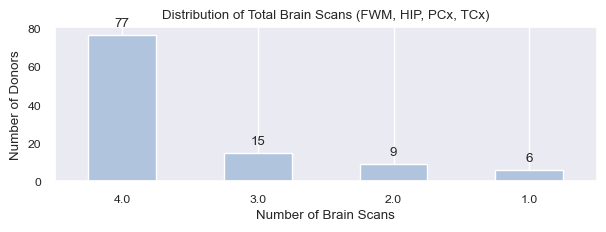

In [14]:
# Creating a bar plot for the distribution with numbers on the bars
bars = distribution.plot(kind='bar', color='lightsteelblue', figsize=(7, 2))
plt.title('Distribution of Total Brain Scans (FWM, HIP, PCx, TCx)')
plt.xlabel('Number of Brain Scans')
plt.ylabel('Number of Donors')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adding numbers to the bars
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center', xytext=(0, 8),
                   textcoords='offset points')

# Showing the plot
plt.show()


In [15]:
# Add the total count of scans to the dataframe
# Grouping by donor_id and counting unique structure_acronyms for each donor
scan_counts = df.groupby('donor_id')['structure_acronym'].nunique().reset_index()

# Renaming the column to "total scan"
scan_counts.rename(columns={'structure_acronym': 'total_scan'}, inplace=True)

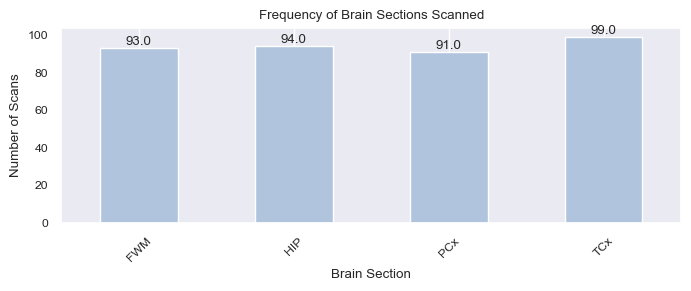

In [16]:
# Counting how often each brain section was scanned
section_counts = table.sum()

# Plotting the bar chart
section_counts.plot(kind="bar", color="lightsteelblue", figsize=(7, 3))
plt.title("Frequency of Brain Sections Scanned")
plt.xlabel("Brain Section")
plt.ylabel("Number of Scans")
plt.xticks(rotation=45)
plt.grid(axis="y")

# Adding numbers to the chart
for index, value in enumerate(section_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', )

plt.tight_layout()
plt.show()

In [17]:
section_counts

structure_acronym
FWM    93.0
HIP    94.0
PCx    91.0
TCx    99.0
dtype: float64

In [18]:
# Displaying the counts for each brain section in a table format
section_counts_df = section_counts.reset_index()
section_counts_df.columns = ["Brain Section", "Number of Scans"]
section_counts_df

,Brain Section,Number of Scans
0,FWM,93.0
1,HIP,94.0
2,PCx,91.0
3,TCx,99.0


In [19]:
# Checking for donors where the brain section was not specified
missing_sections = df[df["structure_acronym"].isnull()]["donor_id"].unique()
num_missing_sections = len(missing_sections)
num_missing_sections

0

In [20]:
df.shape

(377, 33)

## Pivoting the dataframe to a wide format

The original shape of the dataframe was 377 rows and 33 columns, indicating a wide range of data points. To consolidate this information, we pivot (widen) the dataframe. This involves reorganizing the data so that each donor's scans across different brain sections (Frontal White Matter [FWM], Hippocampus [HIP], Posterior Cingulate Cortex [PCx], and Temporal Cortex [TCx]) were aggregated into a single row.

In [21]:
# Drop the specified columns
df.drop(columns=["donor_name", "structure_id"], inplace=True)

# Pivot the dataframe
df_wide = df.pivot(index="donor_id", columns="structure_acronym")

# Rename the columns using the concatenated names
df_wide.columns = ["_".join(col).strip() for col in df_wide.columns.values]

# Reset the index
df_wide.reset_index(inplace=True)

# Display the first few rows of the transformed dataframe
df_wide.head()

,donor_id,ihc_a_syn_FWM,ihc_a_syn_HIP,ihc_a_syn_PCx,ihc_a_syn_TCx,ihc_tau2_ffpe_FWM,ihc_tau2_ffpe_HIP,ihc_tau2_ffpe_PCx,ihc_tau2_ffpe_TCx,ihc_at8_ffpe_FWM,ihc_at8_ffpe_HIP,ihc_at8_ffpe_PCx,ihc_at8_ffpe_TCx,ihc_at8_FWM,ihc_at8_HIP,ihc_at8_PCx,ihc_at8_TCx,ihc_ptdp_43_ffpe_FWM,ihc_ptdp_43_ffpe_HIP,ihc_ptdp_43_ffpe_PCx,ihc_ptdp_43_ffpe_TCx,ihc_a_beta_ffpe_FWM,ihc_a_beta_ffpe_HIP,ihc_a_beta_ffpe_PCx,ihc_a_beta_ffpe_TCx,ihc_a_beta_FWM,ihc_a_beta_HIP,ihc_a_beta_PCx,ihc_a_beta_TCx,ihc_iba1_ffpe_FWM,ihc_iba1_ffpe_HIP,ihc_iba1_ffpe_PCx,ihc_iba1_ffpe_TCx,ihc_gfap_ffpe_FWM,ihc_gfap_ffpe_HIP,ihc_gfap_ffpe_PCx,ihc_gfap_ffpe_TCx,ptau_ng_per_mg_FWM,ptau_ng_per_mg_HIP,ptau_ng_per_mg_PCx,ptau_ng_per_mg_TCx,vegf_pg_per_mg_FWM,vegf_pg_per_mg_HIP,vegf_pg_per_mg_PCx,vegf_pg_per_mg_TCx,ab42_over_ab40_ratio_FWM,ab42_over_ab40_ratio_HIP,ab42_over_ab40_ratio_PCx,ab42_over_ab40_ratio_TCx,tnf_a_pg_per_mg_FWM,tnf_a_pg_per_mg_HIP,tnf_a_pg_per_mg_PCx,tnf_a_pg_per_mg_TCx,tau_ng_per_mg_FWM,tau_ng_per_mg_HIP,tau_ng_per_mg_PCx,tau_ng_per_mg_TCx,il_10_pg_per_mg_FWM,il_10_pg_per_mg_HIP,il_10_pg_per_mg_PCx,il_10_pg_per_mg_TCx,isoprostane_pg_per_mg_FWM,isoprostane_pg_per_mg_HIP,isoprostane_pg_per_mg_PCx,isoprostane_pg_per_mg_TCx,il_6_pg_per_mg_FWM,il_6_pg_per_mg_HIP,il_6_pg_per_mg_PCx,il_6_pg_per_mg_TCx,il_1b_pg_per_mg_FWM,il_1b_pg_per_mg_HIP,il_1b_pg_per_mg_PCx,il_1b_pg_per_mg_TCx,ptau_over_tau_ratio_FWM,ptau_over_tau_ratio_HIP,ptau_over_tau_ratio_PCx,ptau_over_tau_ratio_TCx,il_4_pg_per_mg_FWM,il_4_pg_per_mg_HIP,il_4_pg_per_mg_PCx,il_4_pg_per_mg_TCx,rantes_pg_per_mg_FWM,rantes_pg_per_mg_HIP,rantes_pg_per_mg_PCx,rantes_pg_per_mg_TCx,ab40_pg_per_mg_FWM,ab40_pg_per_mg_HIP,ab40_pg_per_mg_PCx,ab40_pg_per_mg_TCx,a_syn_pg_per_mg_FWM,a_syn_pg_per_mg_HIP,a_syn_pg_per_mg_PCx,a_syn_pg_per_mg_TCx,ifn_g_pg_per_mg_FWM,ifn_g_pg_per_mg_HIP,ifn_g_pg_per_mg_PCx,ifn_g_pg_per_mg_TCx,mcp_1_pg_per_mg_FWM,mcp_1_pg_per_mg_HIP,mcp_1_pg_per_mg_PCx,mcp_1_pg_per_mg_TCx,bdnf_pg_per_mg_FWM,bdnf_pg_per_mg_HIP,bdnf_pg_per_mg_PCx,bdnf_pg_per_mg_TCx,mip_1a_pg_per_mg_FWM,mip_1a_pg_per_mg_HIP,mip_1a_pg_per_mg_PCx,mip_1a_pg_per_mg_TCx,il_7_pg_per_mg_FWM,il_7_pg_per_mg_HIP,il_7_pg_per_mg_PCx,il_7_pg_per_mg_TCx,ab42_pg_per_mg_FWM,ab42_pg_per_mg_HIP,ab42_pg_per_mg_PCx,ab42_pg_per_mg_TCx
0,309335438,0.000104,0.001042,0.000103,0.000138,0.002030,0.008601,0.002360,0.001742,0.000677,0.023308,0.000789,0.007628,0.000060,0.022335,0.000095,0.000090,0.001351,0.002349,0.001703,0.001917,0.003513,0.006869,0.004528,0.007665,0.000378,0.003312,0.002001,0.000941,0.046522,0.088924,0.041810,0.073980,0.066385,NaN,0.025533,0.018081,0.945136,1.057632,1.253245,1.095909,0.46,1.34,1.32,2.24,0.699513,0.315709,50.005286,NaN,0.0,13.02,1.02,0.00,1.128975,1.414214,1.160677,NaN,0.06,8.56,0.2,0.10,NaN,NaN,1.587203,3.384087,13.24,233.06,15.44,5.64,0.0,0.10,0.0,0.0,0.837163,0.747859,1.079753,NaN,0.02,0.0,0.0,0.86,43.98,22.04,56.28,62.82,0.322081,0.746850,0.621950,0.0000,0.070502,0.411676,0.046742,0.02,0.00,1.06,0.02,0.44,34.22,1.36,24.54,27.68,2.92748,4.19939,2.60468,0.02,10.42,51.08,10.26,12.34,10.54,0.16,7.82,24.74,0.225300,0.235788,31.100787,0.078225
1,309335439,0.000064,0.000122,0.000072,0.000060,0.003858,0.008144,0.003865,0.001868,0.001381,0.028297,0.001862,0.004853,0.000192,0.057176,0.000122,0.000211,0.002619,0.003587,0.003211,0.003458,0.002337,0.010164,0.005647,0.010708,0.000923,0.002979,0.003615,0.031352,0.059945,0.112440,0.052399,0.049193,0.081596,0.075589,0.049714,0.027585,1.144276,3.225025,1.360103,1.140454,0.28,0.00,0.80,3.28,3.637114,0.441128,1.408741,2.167325,0.0,18.00,0.00,0.00,1.157743,1.323222,1.177012,1.369168,0.06,4.22,0.2,0.14,NaN,NaN,1.966567,NaN,6.58,32.90,7.58,4.76,0.0,0.10,0.0,0.0,0.988368,2.437252,1.155556,0.832954,0.34,0.0,1.0,0.02,52.90,11.60,45.94,23.44,0.366506,0.698975,0.333188,0.9464,0.050262,0.060818,0.047842,0.03,0.44,0.00,0.30,0.28,75.28,2.00,76.98,55.26,2.50784,11.40098,3.18572,0.03,12.94,112.92,12.74,8.06,8.96,0.72,18.18,17.30,1.333025,0.308337,0.469375,2.051156
2,309335440,NaN,0.000161,NaN,0.000048,N

In [22]:
ic(df_wide.shape)
df_wide.head()

ic| df_wide.shape: (107, 117)


,donor_id,ihc_a_syn_FWM,ihc_a_syn_HIP,ihc_a_syn_PCx,ihc_a_syn_TCx,ihc_tau2_ffpe_FWM,ihc_tau2_ffpe_HIP,ihc_tau2_ffpe_PCx,ihc_tau2_ffpe_TCx,ihc_at8_ffpe_FWM,ihc_at8_ffpe_HIP,ihc_at8_ffpe_PCx,ihc_at8_ffpe_TCx,ihc_at8_FWM,ihc_at8_HIP,ihc_at8_PCx,ihc_at8_TCx,ihc_ptdp_43_ffpe_FWM,ihc_ptdp_43_ffpe_HIP,ihc_ptdp_43_ffpe_PCx,ihc_ptdp_43_ffpe_TCx,ihc_a_beta_ffpe_FWM,ihc_a_beta_ffpe_HIP,ihc_a_beta_ffpe_PCx,ihc_a_beta_ffpe_TCx,ihc_a_beta_FWM,ihc_a_beta_HIP,ihc_a_beta_PCx,ihc_a_beta_TCx,ihc_iba1_ffpe_FWM,ihc_iba1_ffpe_HIP,ihc_iba1_ffpe_PCx,ihc_iba1_ffpe_TCx,ihc_gfap_ffpe_FWM,ihc_gfap_ffpe_HIP,ihc_gfap_ffpe_PCx,ihc_gfap_ffpe_TCx,ptau_ng_per_mg_FWM,ptau_ng_per_mg_HIP,ptau_ng_per_mg_PCx,ptau_ng_per_mg_TCx,vegf_pg_per_mg_FWM,vegf_pg_per_mg_HIP,vegf_pg_per_mg_PCx,vegf_pg_per_mg_TCx,ab42_over_ab40_ratio_FWM,ab42_over_ab40_ratio_HIP,ab42_over_ab40_ratio_PCx,ab42_over_ab40_ratio_TCx,tnf_a_pg_per_mg_FWM,tnf_a_pg_per_mg_HIP,tnf_a_pg_per_mg_PCx,tnf_a_pg_per_mg_TCx,tau_ng_per_mg_FWM,tau_ng_per_mg_HIP,tau_ng_per_mg_PCx,tau_ng_per_mg_TCx,il_10_pg_per_mg_FWM,il_10_pg_per_mg_HIP,il_10_pg_per_mg_PCx,il_10_pg_per_mg_TCx,isoprostane_pg_per_mg_FWM,isoprostane_pg_per_mg_HIP,isoprostane_pg_per_mg_PCx,isoprostane_pg_per_mg_TCx,il_6_pg_per_mg_FWM,il_6_pg_per_mg_HIP,il_6_pg_per_mg_PCx,il_6_pg_per_mg_TCx,il_1b_pg_per_mg_FWM,il_1b_pg_per_mg_HIP,il_1b_pg_per_mg_PCx,il_1b_pg_per_mg_TCx,ptau_over_tau_ratio_FWM,ptau_over_tau_ratio_HIP,ptau_over_tau_ratio_PCx,ptau_over_tau_ratio_TCx,il_4_pg_per_mg_FWM,il_4_pg_per_mg_HIP,il_4_pg_per_mg_PCx,il_4_pg_per_mg_TCx,rantes_pg_per_mg_FWM,rantes_pg_per_mg_HIP,rantes_pg_per_mg_PCx,rantes_pg_per_mg_TCx,ab40_pg_per_mg_FWM,ab40_pg_per_mg_HIP,ab40_pg_per_mg_PCx,ab40_pg_per_mg_TCx,a_syn_pg_per_mg_FWM,a_syn_pg_per_mg_HIP,a_syn_pg_per_mg_PCx,a_syn_pg_per_mg_TCx,ifn_g_pg_per_mg_FWM,ifn_g_pg_per_mg_HIP,ifn_g_pg_per_mg_PCx,ifn_g_pg_per_mg_TCx,mcp_1_pg_per_mg_FWM,mcp_1_pg_per_mg_HIP,mcp_1_pg_per_mg_PCx,mcp_1_pg_per_mg_TCx,bdnf_pg_per_mg_FWM,bdnf_pg_per_mg_HIP,bdnf_pg_per_mg_PCx,bdnf_pg_per_mg_TCx,mip_1a_pg_per_mg_FWM,mip_1a_pg_per_mg_HIP,mip_1a_pg_per_mg_PCx,mip_1a_pg_per_mg_TCx,il_7_pg_per_mg_FWM,il_7_pg_per_mg_HIP,il_7_pg_per_mg_PCx,il_7_pg_per_mg_TCx,ab42_pg_per_mg_FWM,ab42_pg_per_mg_HIP,ab42_pg_per_mg_PCx,ab42_pg_per_mg_TCx
0,309335438,0.000104,0.001042,0.000103,0.000138,0.002030,0.008601,0.002360,0.001742,0.000677,0.023308,0.000789,0.007628,0.000060,0.022335,0.000095,0.000090,0.001351,0.002349,0.001703,0.001917,0.003513,0.006869,0.004528,0.007665,0.000378,0.003312,0.002001,0.000941,0.046522,0.088924,0.041810,0.073980,0.066385,NaN,0.025533,0.018081,0.945136,1.057632,1.253245,1.095909,0.46,1.34,1.32,2.24,0.699513,0.315709,50.005286,NaN,0.0,13.02,1.02,0.00,1.128975,1.414214,1.160677,NaN,0.06,8.56,0.2,0.10,NaN,NaN,1.587203,3.384087,13.24,233.06,15.44,5.64,0.0,0.10,0.0,0.0,0.837163,0.747859,1.079753,NaN,0.02,0.0,0.0,0.86,43.98,22.04,56.28,62.82,0.322081,0.746850,0.621950,0.0000,0.070502,0.411676,0.046742,0.02,0.00,1.06,0.02,0.44,34.22,1.36,24.54,27.68,2.92748,4.19939,2.60468,0.02,10.42,51.08,10.26,12.34,10.54,0.16,7.82,24.74,0.225300,0.235788,31.100787,0.078225
1,309335439,0.000064,0.000122,0.000072,0.000060,0.003858,0.008144,0.003865,0.001868,0.001381,0.028297,0.001862,0.004853,0.000192,0.057176,0.000122,0.000211,0.002619,0.003587,0.003211,0.003458,0.002337,0.010164,0.005647,0.010708,0.000923,0.002979,0.003615,0.031352,0.059945,0.112440,0.052399,0.049193,0.081596,0.075589,0.049714,0.027585,1.144276,3.225025,1.360103,1.140454,0.28,0.00,0.80,3.28,3.637114,0.441128,1.408741,2.167325,0.0,18.00,0.00,0.00,1.157743,1.323222,1.177012,1.369168,0.06,4.22,0.2,0.14,NaN,NaN,1.966567,NaN,6.58,32.90,7.58,4.76,0.0,0.10,0.0,0.0,0.988368,2.437252,1.155556,0.832954,0.34,0.0,1.0,0.02,52.90,11.60,45.94,23.44,0.366506,0.698975,0.333188,0.9464,0.050262,0.060818,0.047842,0.03,0.44,0.00,0.30,0.28,75.28,2.00,76.98,55.26,2.50784,11.40098,3.18572,0.03,12.94,112.92,12.74,8.06,8.96,0.72,18.18,17.30,1.333025,0.308337,0.469375,2.051156
2,309335440,NaN,0.000161,NaN,0.000048,N

In [23]:
# Calculating the number of missing values for each donor
donor_missing_values = df_wide.set_index("donor_id").isnull().sum(axis=1)
donor_missing_values_sorted = donor_missing_values.sort_values(ascending=False)
donor_missing_values_sorted

donor_id
309335464    113
309335448    108
326765664    100
326765671     94
326765652     94
309335442     88
309335478     88
467056405     83
309335440     82
309335462     73
326765672     70
309335481     67
309335466     65
309335449     60
326765665     60
309335459     53
309335450     53
309335458     51
309335445     50
309335479     50
309335471     49
309335475     46
326765670     43
309335495     42
326765689     42
309335496     42
326765686     41
326765688     41
326765661     41
309335488     41
309335457     40
309335476     34
309335477     33
326765677     31
309335486     31
309335480     30
326765684     30
326765666     30
326765685     30
326765660     30
309335453     30
309335443     27
309335446     26
326765653     22
326765687     22
326765649     22
309335494     22
326765682     22
326765676     21
467056406     21
326765680     21
309335454     15
326765669     15
326765681     14
309335469     11
309335463     11
309335441     10
309335452      9
32676

In [24]:
# Replacing missing values in df_wide with -1
df_wide.fillna(-1, inplace=True)
df_wide.head()

,donor_id,ihc_a_syn_FWM,ihc_a_syn_HIP,ihc_a_syn_PCx,ihc_a_syn_TCx,ihc_tau2_ffpe_FWM,ihc_tau2_ffpe_HIP,ihc_tau2_ffpe_PCx,ihc_tau2_ffpe_TCx,ihc_at8_ffpe_FWM,ihc_at8_ffpe_HIP,ihc_at8_ffpe_PCx,ihc_at8_ffpe_TCx,ihc_at8_FWM,ihc_at8_HIP,ihc_at8_PCx,ihc_at8_TCx,ihc_ptdp_43_ffpe_FWM,ihc_ptdp_43_ffpe_HIP,ihc_ptdp_43_ffpe_PCx,ihc_ptdp_43_ffpe_TCx,ihc_a_beta_ffpe_FWM,ihc_a_beta_ffpe_HIP,ihc_a_beta_ffpe_PCx,ihc_a_beta_ffpe_TCx,ihc_a_beta_FWM,ihc_a_beta_HIP,ihc_a_beta_PCx,ihc_a_beta_TCx,ihc_iba1_ffpe_FWM,ihc_iba1_ffpe_HIP,ihc_iba1_ffpe_PCx,ihc_iba1_ffpe_TCx,ihc_gfap_ffpe_FWM,ihc_gfap_ffpe_HIP,ihc_gfap_ffpe_PCx,ihc_gfap_ffpe_TCx,ptau_ng_per_mg_FWM,ptau_ng_per_mg_HIP,ptau_ng_per_mg_PCx,ptau_ng_per_mg_TCx,vegf_pg_per_mg_FWM,vegf_pg_per_mg_HIP,vegf_pg_per_mg_PCx,vegf_pg_per_mg_TCx,ab42_over_ab40_ratio_FWM,ab42_over_ab40_ratio_HIP,ab42_over_ab40_ratio_PCx,ab42_over_ab40_ratio_TCx,tnf_a_pg_per_mg_FWM,tnf_a_pg_per_mg_HIP,tnf_a_pg_per_mg_PCx,tnf_a_pg_per_mg_TCx,tau_ng_per_mg_FWM,tau_ng_per_mg_HIP,tau_ng_per_mg_PCx,tau_ng_per_mg_TCx,il_10_pg_per_mg_FWM,il_10_pg_per_mg_HIP,il_10_pg_per_mg_PCx,il_10_pg_per_mg_TCx,isoprostane_pg_per_mg_FWM,isoprostane_pg_per_mg_HIP,isoprostane_pg_per_mg_PCx,isoprostane_pg_per_mg_TCx,il_6_pg_per_mg_FWM,il_6_pg_per_mg_HIP,il_6_pg_per_mg_PCx,il_6_pg_per_mg_TCx,il_1b_pg_per_mg_FWM,il_1b_pg_per_mg_HIP,il_1b_pg_per_mg_PCx,il_1b_pg_per_mg_TCx,ptau_over_tau_ratio_FWM,ptau_over_tau_ratio_HIP,ptau_over_tau_ratio_PCx,ptau_over_tau_ratio_TCx,il_4_pg_per_mg_FWM,il_4_pg_per_mg_HIP,il_4_pg_per_mg_PCx,il_4_pg_per_mg_TCx,rantes_pg_per_mg_FWM,rantes_pg_per_mg_HIP,rantes_pg_per_mg_PCx,rantes_pg_per_mg_TCx,ab40_pg_per_mg_FWM,ab40_pg_per_mg_HIP,ab40_pg_per_mg_PCx,ab40_pg_per_mg_TCx,a_syn_pg_per_mg_FWM,a_syn_pg_per_mg_HIP,a_syn_pg_per_mg_PCx,a_syn_pg_per_mg_TCx,ifn_g_pg_per_mg_FWM,ifn_g_pg_per_mg_HIP,ifn_g_pg_per_mg_PCx,ifn_g_pg_per_mg_TCx,mcp_1_pg_per_mg_FWM,mcp_1_pg_per_mg_HIP,mcp_1_pg_per_mg_PCx,mcp_1_pg_per_mg_TCx,bdnf_pg_per_mg_FWM,bdnf_pg_per_mg_HIP,bdnf_pg_per_mg_PCx,bdnf_pg_per_mg_TCx,mip_1a_pg_per_mg_FWM,mip_1a_pg_per_mg_HIP,mip_1a_pg_per_mg_PCx,mip_1a_pg_per_mg_TCx,il_7_pg_per_mg_FWM,il_7_pg_per_mg_HIP,il_7_pg_per_mg_PCx,il_7_pg_per_mg_TCx,ab42_pg_per_mg_FWM,ab42_pg_per_mg_HIP,ab42_pg_per_mg_PCx,ab42_pg_per_mg_TCx
0,309335438,0.000104,0.001042,0.000103,0.000138,0.002030,0.008601,0.002360,0.001742,0.000677,0.023308,0.000789,0.007628,0.000060,0.022335,0.000095,0.000090,0.001351,0.002349,0.001703,0.001917,0.003513,0.006869,0.004528,0.007665,0.000378,0.003312,0.002001,0.000941,0.046522,0.088924,0.041810,0.073980,0.066385,-1.000000,0.025533,0.018081,0.945136,1.057632,1.253245,1.095909,0.46,1.34,1.32,2.24,0.699513,0.315709,50.005286,-1.000000,0.0,13.02,1.02,0.00,1.128975,1.414214,1.160677,-1.000000,0.06,8.56,0.2,0.10,-1.0,-1.0,1.587203,3.384087,13.24,233.06,15.44,5.64,0.0,0.10,0.0,0.0,0.837163,0.747859,1.079753,-1.000000,0.02,0.0,0.0,0.86,43.98,22.04,56.28,62.82,0.322081,0.746850,0.621950,0.0000,0.070502,0.411676,0.046742,0.02,0.00,1.06,0.02,0.44,34.22,1.36,24.54,27.68,2.92748,4.19939,2.60468,0.02,10.42,51.08,10.26,12.34,10.54,0.16,7.82,24.74,0.225300,0.235788,31.100787,0.078225
1,309335439,0.000064,0.000122,0.000072,0.000060,0.003858,0.008144,0.003865,0.001868,0.001381,0.028297,0.001862,0.004853,0.000192,0.057176,0.000122,0.000211,0.002619,0.003587,0.003211,0.003458,0.002337,0.010164,0.005647,0.010708,0.000923,0.002979,0.003615,0.031352,0.059945,0.112440,0.052399,0.049193,0.081596,0.075589,0.049714,0.027585,1.144276,3.225025,1.360103,1.140454,0.28,0.00,0.80,3.28,3.637114,0.441128,1.408741,2.167325,0.0,18.00,0.00,0.00,1.157743,1.323222,1.177012,1.369168,0.06,4.22,0.2,0.14,-1.0,-1.0,1.966567,-1.000000,6.58,32.90,7.58,4.76,0.0,0.10,0.0,0.0,0.988368,2.437252,1.155556,0.832954,0.34,0.0,1.0,0.02,52.90,11.60,45.94,23.44,0.366506,0.698975,0.333188,0.9464,0.050262,0.060818,0.047842,0.03,0.44,0.00,0.30,0.28,75.28,2.00,76.98,55.26,2.50784,11.40098,3.18572,0.03,12.94,112.92,12.74,8.06,8.96,0.72,18.18,17.30,1.333025,0.308337,0.469375,2.051156
2,309

In [25]:
# Add total scans to the wide dataframe
# Merging the scan count back into the original dataframe
df_wide = df_wide.merge(scan_counts, on='donor_id')

In [26]:
# Display the first few rows of the merged dataframe
df_wide.head()

,donor_id,ihc_a_syn_FWM,ihc_a_syn_HIP,ihc_a_syn_PCx,ihc_a_syn_TCx,ihc_tau2_ffpe_FWM,ihc_tau2_ffpe_HIP,ihc_tau2_ffpe_PCx,ihc_tau2_ffpe_TCx,ihc_at8_ffpe_FWM,ihc_at8_ffpe_HIP,ihc_at8_ffpe_PCx,ihc_at8_ffpe_TCx,ihc_at8_FWM,ihc_at8_HIP,ihc_at8_PCx,ihc_at8_TCx,ihc_ptdp_43_ffpe_FWM,ihc_ptdp_43_ffpe_HIP,ihc_ptdp_43_ffpe_PCx,ihc_ptdp_43_ffpe_TCx,ihc_a_beta_ffpe_FWM,ihc_a_beta_ffpe_HIP,ihc_a_beta_ffpe_PCx,ihc_a_beta_ffpe_TCx,ihc_a_beta_FWM,ihc_a_beta_HIP,ihc_a_beta_PCx,ihc_a_beta_TCx,ihc_iba1_ffpe_FWM,ihc_iba1_ffpe_HIP,ihc_iba1_ffpe_PCx,ihc_iba1_ffpe_TCx,ihc_gfap_ffpe_FWM,ihc_gfap_ffpe_HIP,ihc_gfap_ffpe_PCx,ihc_gfap_ffpe_TCx,ptau_ng_per_mg_FWM,ptau_ng_per_mg_HIP,ptau_ng_per_mg_PCx,ptau_ng_per_mg_TCx,vegf_pg_per_mg_FWM,vegf_pg_per_mg_HIP,vegf_pg_per_mg_PCx,vegf_pg_per_mg_TCx,ab42_over_ab40_ratio_FWM,ab42_over_ab40_ratio_HIP,ab42_over_ab40_ratio_PCx,ab42_over_ab40_ratio_TCx,tnf_a_pg_per_mg_FWM,tnf_a_pg_per_mg_HIP,tnf_a_pg_per_mg_PCx,tnf_a_pg_per_mg_TCx,tau_ng_per_mg_FWM,tau_ng_per_mg_HIP,tau_ng_per_mg_PCx,tau_ng_per_mg_TCx,il_10_pg_per_mg_FWM,il_10_pg_per_mg_HIP,il_10_pg_per_mg_PCx,il_10_pg_per_mg_TCx,isoprostane_pg_per_mg_FWM,isoprostane_pg_per_mg_HIP,isoprostane_pg_per_mg_PCx,isoprostane_pg_per_mg_TCx,il_6_pg_per_mg_FWM,il_6_pg_per_mg_HIP,il_6_pg_per_mg_PCx,il_6_pg_per_mg_TCx,il_1b_pg_per_mg_FWM,il_1b_pg_per_mg_HIP,il_1b_pg_per_mg_PCx,il_1b_pg_per_mg_TCx,ptau_over_tau_ratio_FWM,ptau_over_tau_ratio_HIP,ptau_over_tau_ratio_PCx,ptau_over_tau_ratio_TCx,il_4_pg_per_mg_FWM,il_4_pg_per_mg_HIP,il_4_pg_per_mg_PCx,il_4_pg_per_mg_TCx,rantes_pg_per_mg_FWM,rantes_pg_per_mg_HIP,rantes_pg_per_mg_PCx,rantes_pg_per_mg_TCx,ab40_pg_per_mg_FWM,ab40_pg_per_mg_HIP,ab40_pg_per_mg_PCx,ab40_pg_per_mg_TCx,a_syn_pg_per_mg_FWM,a_syn_pg_per_mg_HIP,a_syn_pg_per_mg_PCx,a_syn_pg_per_mg_TCx,ifn_g_pg_per_mg_FWM,ifn_g_pg_per_mg_HIP,ifn_g_pg_per_mg_PCx,ifn_g_pg_per_mg_TCx,mcp_1_pg_per_mg_FWM,mcp_1_pg_per_mg_HIP,mcp_1_pg_per_mg_PCx,mcp_1_pg_per_mg_TCx,bdnf_pg_per_mg_FWM,bdnf_pg_per_mg_HIP,bdnf_pg_per_mg_PCx,bdnf_pg_per_mg_TCx,mip_1a_pg_per_mg_FWM,mip_1a_pg_per_mg_HIP,mip_1a_pg_per_mg_PCx,mip_1a_pg_per_mg_TCx,il_7_pg_per_mg_FWM,il_7_pg_per_mg_HIP,il_7_pg_per_mg_PCx,il_7_pg_per_mg_TCx,ab42_pg_per_mg_FWM,ab42_pg_per_mg_HIP,ab42_pg_per_mg_PCx,ab42_pg_per_mg_TCx,total_scan
0,309335438,0.000104,0.001042,0.000103,0.000138,0.002030,0.008601,0.002360,0.001742,0.000677,0.023308,0.000789,0.007628,0.000060,0.022335,0.000095,0.000090,0.001351,0.002349,0.001703,0.001917,0.003513,0.006869,0.004528,0.007665,0.000378,0.003312,0.002001,0.000941,0.046522,0.088924,0.041810,0.073980,0.066385,-1.000000,0.025533,0.018081,0.945136,1.057632,1.253245,1.095909,0.46,1.34,1.32,2.24,0.699513,0.315709,50.005286,-1.000000,0.0,13.02,1.02,0.00,1.128975,1.414214,1.160677,-1.000000,0.06,8.56,0.2,0.10,-1.0,-1.0,1.587203,3.384087,13.24,233.06,15.44,5.64,0.0,0.10,0.0,0.0,0.837163,0.747859,1.079753,-1.000000,0.02,0.0,0.0,0.86,43.98,22.04,56.28,62.82,0.322081,0.746850,0.621950,0.0000,0.070502,0.411676,0.046742,0.02,0.00,1.06,0.02,0.44,34.22,1.36,24.54,27.68,2.92748,4.19939,2.60468,0.02,10.42,51.08,10.26,12.34,10.54,0.16,7.82,24.74,0.225300,0.235788,31.100787,0.078225,4
1,309335439,0.000064,0.000122,0.000072,0.000060,0.003858,0.008144,0.003865,0.001868,0.001381,0.028297,0.001862,0.004853,0.000192,0.057176,0.000122,0.000211,0.002619,0.003587,0.003211,0.003458,0.002337,0.010164,0.005647,0.010708,0.000923,0.002979,0.003615,0.031352,0.059945,0.112440,0.052399,0.049193,0.081596,0.075589,0.049714,0.027585,1.144276,3.225025,1.360103,1.140454,0.28,0.00,0.80,3.28,3.637114,0.441128,1.408741,2.167325,0.0,18.00,0.00,0.00,1.157743,1.323222,1.177012,1.369168,0.06,4.22,0.2,0.14,-1.0,-1.0,1.966567,-1.000000,6.58,32.90,7.58,4.76,0.0,0.10,0.0,0.0,0.988368,2.437252,1.155556,0.832954,0.34,0.0,1.0,0.02,52.90,11.60,45.94,23.44,0.366506,0.698975,0.333188,0.9464,0.050262,0.060818,0.047842,0.03,0.44,0.00,0.30,0.28,75.28,2.00,76.98,55.26,2.50784,11.40098,3.18572,0.03,12.94,112.92,12.74,8.06,8.96,0.72,18.18,17.30,1.333025,0.308337,0.469375,2

In [27]:
# Check the merged data
df_wide['total_scan'].value_counts()

total_scan
4    77
3    15
2     9
1     6
Name: count, dtype: int64

## Exports

In [28]:
# Export
file = "papq_wide_cleaned"
df_wide.to_csv(ROOT_PATH + PATH_DATA_INT + f"{file}.csv")
df_wide.to_parquet(ROOT_PATH + PATH_DATA_INT + f"{file}.parquet")

## Watermark

In [29]:
%load_ext watermark

In [30]:
%watermark

Last updated: 2023-12-08T16:00:48.208976+01:00

Python implementation: CPython
Python version       : 3.9.16
IPython version      : 8.16.1

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 22.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit



In [31]:
%watermark --iversions

matplotlib: 3.8.0
seaborn   : 0.13.0
pandas    : 2.1.1



-----


## Snapshot

In [32]:
today = date.today()
output_file = f"{ROOT_PATH}{PATH_HTML}{today}_{notebook_name}.html"
input_file = f"{notebook_name}.ipynb"
print(input_file)
!jupyter nbconvert --to html {input_file} --output {output_file}

01.03_clean_papq.ipynb


[NbConvertApp] Converting notebook 01.03_clean_papq.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 442565 bytes to ../reports/html/2023-12-08_01.03_clean_papq.html


In [33]:
# Construct the output file path
output_file = f"{ROOT_PATH}{PATH_HTML}{today}_{notebook_name}_no_code.html"
print(output_file)

# Construct the input file path
input_file = f"{notebook_name}.ipynb"

# Convert the notebook to HTML without the code cells
os.system(f"jupyter nbconvert --to html {input_file} --output {output_file} --no-input")

../reports/html/2023-12-08_01.03_clean_papq_no_code.html


[NbConvertApp] Converting notebook 01.03_clean_papq.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 400710 bytes to ../reports/html/2023-12-08_01.03_clean_papq_no_code.html


0